In [1]:
# import libraries
import boto3, re, sys, math, json, os, sagemaker, urllib.request
from sagemaker import get_execution_role
import numpy as np                                
import pandas as pd                               
import matplotlib.pyplot as plt    
from sagemaker.predictor import csv_serializer   


In [95]:
import seaborn as sns


In [3]:
bucket='msds-capstone-project'
data_key = 'graduates.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

rawdata=pd.read_csv(data_location)

In [139]:
rawdata.head()


,Year,Demographics.Total,Education.Major,Salaries.Highest,Salaries.Lowest,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,1993,1295598,Biological Sciences,999999.0,0.0,160585.73,51000.0,13432,297818.25,84495,...,118772,191867,365049,539430,99749,103385,506252,269042,215169,381908
1,1993,211875,Chemical Engineering,999999.0,9000.0,126176.52,56000.0,3375,245705.77,27531,...,82344,76108,59299,102248,16361,30480,24690,63895,44780,17718
2,1993,507616,Chemistry,999999.0,8000.0,148872.00,60000.0,7834,276000.33,49984,...,81772,123256,121783,208278,35007,40898,129716,114801,78059,104191
3,1993,336366,Civil Engineering,999999.0,10000.0,129070.55,50000.0,4035,259543.49,37295,...,133430,62031,108338,203035,37940,28639,70727,116758,73133,26892
4,1993,1070111,Computer Science and Math,999999.0,0.0,134299.53,49000.0,9996,269323.82,83826,...,251941,200490,287405,439446,62482,73411,126083,223467,168404,234507


In [140]:
majors=rawdata['Education.Major']

In [141]:
print(majors)

0                 Biological Sciences
1                Chemical Engineering
2                           Chemistry
3                   Civil Engineering
4           Computer Science and Math
                    ...              
512                         Sociology
513                        Statistics
514                  Zoology, General
515       Management & Administration
516    Political and related sciences
Name: Education.Major, Length: 517, dtype: object


In [142]:
#calculate key ratios, and simplify the dataset.
#year range:
raw_15=rawdata.loc[rawdata['Year'] == 2015]

In [143]:
len(raw_15)

47

In [144]:
raw_15.head()

,Year,Demographics.Total,Education.Major,Salaries.Highest,Salaries.Lowest,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
470,2015,71729,Agricultural Economics,1038725.0,0.0,89197.42,70000.0,138,101326.64,1742,...,12305,12875,28479,42443,10119,9911,25925,20970,52257,12358
471,2015,180284,Animal Sciences,1223166.0,200.0,72244.94,52000.0,365,114742.43,7817,...,21689,38180,50298,85353,21137,57924,69731,51793,86107,43372
472,2015,337852,Anthropology and Archeology,1223166.0,0.0,64775.19,50000.0,728,102929.99,9211,...,39149,51362,93983,163186,55572,28622,79164,57255,90946,103800
473,2015,243331,Area and Ethnic Studies,320000.0,0.0,61430.39,52230.0,533,43498.76,16510,...,51380,51771,58329,109203,39237,9480,74875,37130,72850,87390
474,2015,30906,Atmospheric Sciences and Meteorology,203650.0,10920.0,74487.92,72000.0,161,36618.44,1543,...,7369,14912,3498,11093,2697,5997,10028,9155,4646,3318


In [145]:
raw_15.tail()

,Year,Demographics.Total,Education.Major,Salaries.Highest,Salaries.Lowest,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
512,2015,1176525,Sociology,1223166.0,0.0,58871.70,50000.0,1798,62083.18,59244,...,85782,151538,261143,415552,204818,72050,342903,183692,345302,301924
513,2015,55738,Statistics,1038725.0,0.0,99210.87,88000.0,157,90534.66,16211,...,13908,11798,8419,19960,3437,5489,12803,7736,10741,6290
514,2015,169991,"Zoology, General",1223166.0,0.0,86957.98,60000.0,317,124675.05,17563,...,15366,30180,29873,60016,29924,24622,57404,30979,35810,56660
515,2015,0,Management & Administration,0.0,0.0,0.00,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
516,2015,0,Political and related sciences,0.0,0.0,0.00,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
proportions=(raw_15.iloc[:,9:]).div(raw_15['Demographics.Total'], axis=0)

In [29]:
proportions

,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Degrees.Bachelors,Education.Degrees.Doctorates,Education.Degrees.Masters,Education.Degrees.Professionals,Employment.Employer Type.Business/Industry,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
470,0.024286,0.075046,0.900668,0.240377,0.759623,0.833470,0.008379,0.146008,0.012143,0.777886,...,0.171548,0.179495,0.397036,0.591713,0.141073,0.138173,0.361430,0.292350,0.728534,0.172287
471,0.043359,0.126683,0.829952,0.396347,0.603653,0.628087,0.039271,0.170964,0.161678,0.748979,...,0.120305,0.211777,0.278993,0.473436,0.117243,0.321293,0.386784,0.287286,0.477619,0.240576
472,0.027263,0.167032,0.805705,0.626552,0.373445,0.529439,0.049868,0.334869,0.085825,0.538171,...,0.115876,0.152025,0.278178,0.483010,0.164486,0.084718,0.234316,0.169468,0.269189,0.307235
473,0.067850,0.242645,0.689505,0.740699,0.259301,0.513494,0.049143,0.352643,0.084720,0.456966,...,0.211153,0.212760,0.239711,0.448784,0.161249,0.038959,0.307708,0.152591,0.299386,0.359140
474,0.049926,0.109137,0.840905,0.326862,0.673106,0.603119,0.072769,0.324112,0.000000,0.563095,...,0.238433,0.482495,0.113182,0.358927,0.087265,0.194040,0.324468,0.296221,0.150327,0.107358
475,0.232987,0.108698,0.658315,0.502432,0.497568,0.518032,0.129500,0.167402,0.185061,0.499890,...,0.209156,0.275694,0.184875,0.501233,0.076774,0.195780,0.300805,0.192082,0.150816,0.226514
476,0.118276,0.180356,0.701368,0.527756,0.472244,0.487999,0.072825,0.219636,0.219540,0.547453,...,0.124771,0.180071,0.210180,0.438878,0.094519,0.153905,0.426711,0.211510,0.219224,0.296764
477,0.353100,0.087360,0.559506,0.583972,0.416028,0.360423,0.187414,0.351287,0.100842,0.466671,...,0.091090,0.158466,0.065699,0.313715,0.119251,0.199357,0.108541,0.282336,0.298898,0.193813
478,0.176750,0.147579,0.675671,0.241374,0.758626,0.578722,0.094134,0.294764,0.032381,0.747405,...,0.417543,0.391814,0.241447,0.600101,0.076078,0.314853,0.165269,0.381399,0.242181,0.166519
479,0.180176,0.119669,0.700154,0.409623,0.590377,0.453875,0.181217,0.252630,0.112278,0.531788,...,0.182976,0.262872,0.172183,0.447062,0.081297,0.183049,0.242073,0.230298,0.171818,0.261228


In [34]:
selected_proportions=proportions[['Demographics.Ethnicity.Minorities','Demographics.Gender.Females','Employment.Employer Type.Business/Industry','Employment.Employer Type.Educational Institution',
                                  'Employment.Employer Type.Government','Employment.Status.Unemployed','Education.Degrees.Bachelors','Education.Degrees.Masters',
                                  'Education.Degrees.Doctorates']]
                                 

In [35]:
selected_proportions

,Demographics.Ethnicity.Minorities,Demographics.Gender.Females,Employment.Employer Type.Business/Industry,Employment.Employer Type.Educational Institution,Employment.Employer Type.Government,Employment.Status.Unemployed,Education.Degrees.Bachelors,Education.Degrees.Masters,Education.Degrees.Doctorates
470,0.075046,0.240377,0.777886,0.020898,0.095903,0.010902,0.833470,0.146008,0.008379
471,0.126683,0.396347,0.748979,0.067688,0.049350,0.008720,0.628087,0.170964,0.039271
472,0.167032,0.626552,0.538171,0.152744,0.101180,0.031700,0.529439,0.334869,0.049868
473,0.242645,0.740699,0.456966,0.232663,0.066814,0.028336,0.513494,0.352643,0.049143
474,0.109137,0.326862,0.563095,0.097166,0.175338,0.000000,0.603119,0.324112,0.072769
475,0.108698,0.502432,0.499890,0.146435,0.129678,0.060471,0.518032,0.167402,0.129500
476,0.180356,0.527756,0.547453,0.165061,0.090666,0.032998,0.487999,0.219636,0.072825
477,0.087360,0.583972,0.466671,0.137011,0.045955,0.012558,0.360423,0.351287,0.187414
478,0.147579,0.241374,0.747405,0.054114,0.041273,0.024940,0.578722,0.294764,0.094134
479,0.119669,0.409623,0.531788,0.174461,0.056536,0.021292,0.453875,0.252630,0.181217


In [36]:
type(selected_proportions)

pandas.core.frame.DataFrame

In [152]:
new_data=raw_15[['Education.Major']].combine_first(selected_proportions)

In [153]:
new_data=new_data.dropna()

In [154]:
cols = new_data.columns.tolist()


In [155]:
add_cols=[cols[5]]+cols[:5]+cols[6:]

In [156]:
add_cols

['Education.Major',
 'Demographics.Ethnicity.Minorities',
 'Demographics.Gender.Females',
 'Education.Degrees.Bachelors',
 'Education.Degrees.Doctorates',
 'Education.Degrees.Masters',
 'Employment.Employer Type.Business/Industry',
 'Employment.Employer Type.Educational Institution',
 'Employment.Employer Type.Government',
 'Employment.Status.Unemployed']

In [157]:
new_data=new_data[add_cols]

In [158]:
new_data.head()

,Education.Major,Demographics.Ethnicity.Minorities,Demographics.Gender.Females,Education.Degrees.Bachelors,Education.Degrees.Doctorates,Education.Degrees.Masters,Employment.Employer Type.Business/Industry,Employment.Employer Type.Educational Institution,Employment.Employer Type.Government,Employment.Status.Unemployed
470,Agricultural Economics,0.075046,0.240377,0.833470,0.008379,0.146008,0.777886,0.020898,0.095903,0.010902
471,Animal Sciences,0.126683,0.396347,0.628087,0.039271,0.170964,0.748979,0.067688,0.049350,0.008720
472,Anthropology and Archeology,0.167032,0.626552,0.529439,0.049868,0.334869,0.538171,0.152744,0.101180,0.031700
473,Area and Ethnic Studies,0.242645,0.740699,0.513494,0.049143,0.352643,0.456966,0.232663,0.066814,0.028336
474,Atmospheric Sciences and Meteorology,0.109137,0.326862,0.603119,0.072769,0.324112,0.563095,0.097166,0.175338,0.000000


In [159]:
new_data.tail()

,Education.Major,Demographics.Ethnicity.Minorities,Demographics.Gender.Females,Education.Degrees.Bachelors,Education.Degrees.Doctorates,Education.Degrees.Masters,Employment.Employer Type.Business/Industry,Employment.Employer Type.Educational Institution,Employment.Employer Type.Government,Employment.Status.Unemployed
510,Psychology,0.200971,0.702370,0.568549,0.049253,0.330014,0.486018,0.184606,0.102230,0.035483
511,Public Policy Studies,0.156337,0.460896,0.608869,0.013461,0.304059,0.373344,0.093379,0.169875,0.001288
512,Sociology,0.259926,0.681501,0.634954,0.024253,0.302606,0.415946,0.177046,0.094605,0.025645
513,Statistics,0.102677,0.651889,0.576949,0.067118,0.336108,0.588450,0.061879,0.081040,0.011123
514,"Zoology, General",0.075628,0.427364,0.345936,0.156161,0.232424,0.446753,0.162538,0.128448,0.010018


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Demographics.Ethnicity.Minorities'),
  Text(1, 0, 'Demographics.Gender.Females'),
  Text(2, 0, 'Education.Degrees.Bachelors'),
  Text(3, 0, 'Education.Degrees.Doctorates'),
  Text(4, 0, 'Education.Degrees.Masters'),
  Text(5, 0, 'Employment.Employer Type.Business/Industry'),
  Text(6, 0, 'Employment.Employer Type.Educational Institution'),
  Text(7, 0, 'Employment.Employer Type.Government'),
  Text(8, 0, 'Employment.Status.Unemployed')])

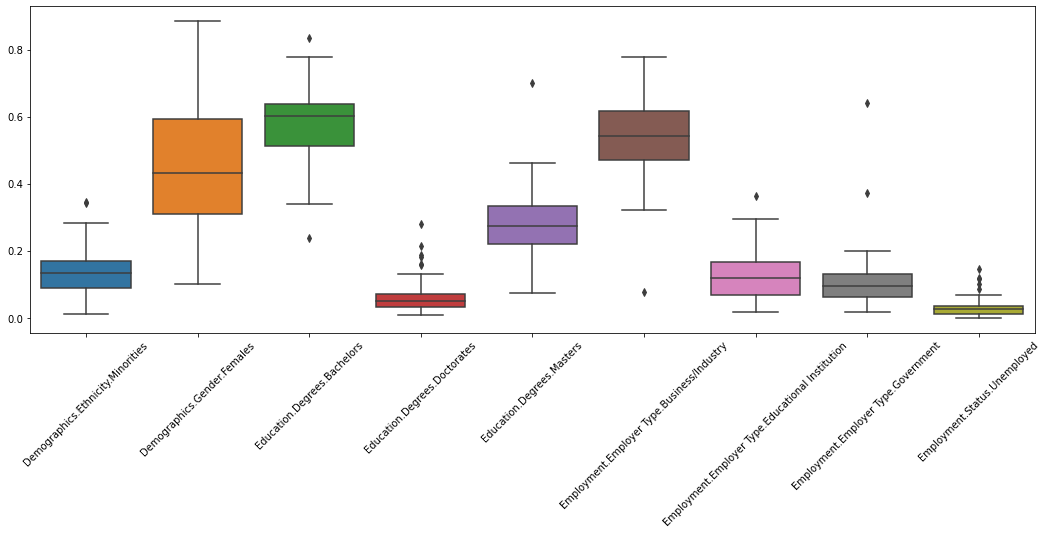

In [102]:
#visualize distributions
plt.figure(figsize = (18, 6))
sns.boxplot(data=new_data.iloc[:,1:])
plt.xticks(rotation=45)


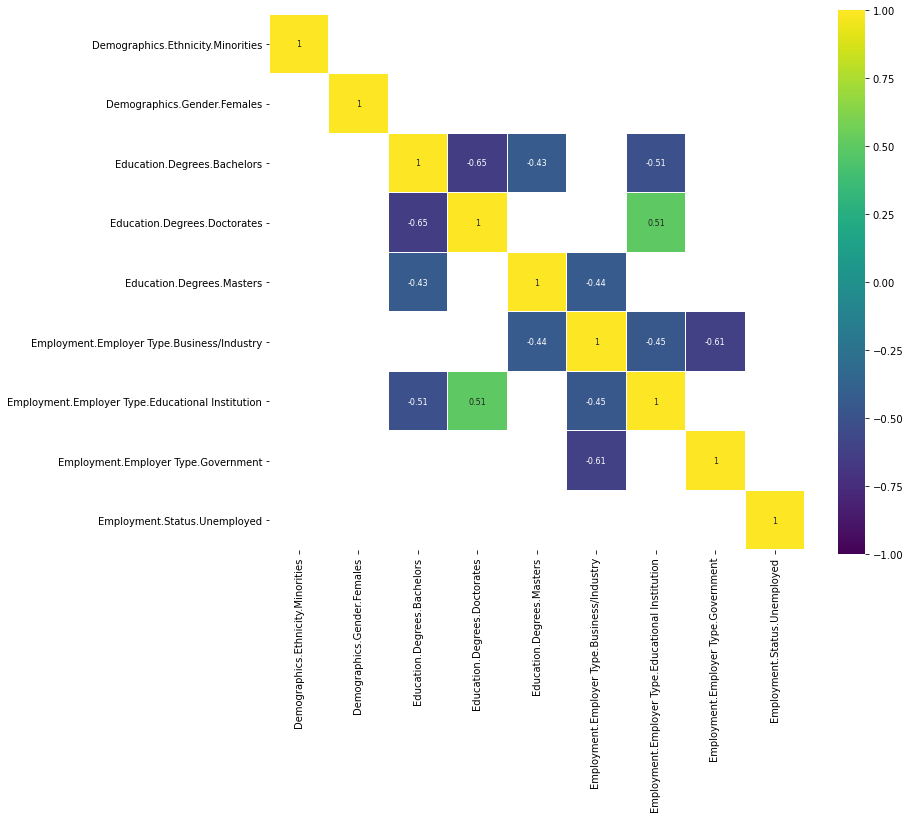

In [160]:
corr = new_data.drop('Education.Major', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [161]:
corr

,Demographics.Ethnicity.Minorities,Demographics.Gender.Females,Education.Degrees.Bachelors,Education.Degrees.Doctorates,Education.Degrees.Masters,Employment.Employer Type.Business/Industry,Employment.Employer Type.Educational Institution,Employment.Employer Type.Government,Employment.Status.Unemployed
Demographics.Ethnicity.Minorities,1.000000,0.368117,-0.084363,-0.075508,-0.174870,-0.021254,0.219904,0.130767,-0.077304
Demographics.Gender.Females,0.368117,1.000000,-0.161582,-0.018454,-0.124118,-0.242056,0.381924,-0.223772,0.083501
Education.Degrees.Bachelors,-0.084363,-0.161582,1.000000,-0.646151,-0.431680,0.491205,-0.509146,-0.277211,0.186180
Education.Degrees.Doctorates,-0.075508,-0.018454,-0.646151,1.000000,-0.095749,-0.191785,0.506438,-0.112761,-0.187106
Education.Degrees.Masters,-0.174870,-0.124118,-0.431680,-0.095749,1.000000,-0.436384,-0.032301,0.497381,-0.077417
Employment.Employer Type.Business/Industry,-0.021254,-0.242056,0.491205,-0.191785,-0.436384,1.000000,-0.454851,-0.613847,-0.056571
Employment.Employer Type.Educational Institution,0.219904,0.381924,-0.509146,0.506438,-0.032301,-0.454851,1.000000,-0.068835,-0.153584
Employment.Employer Type.Government,0.130767,-0.223772,-0.277211,-0.112761,0.497381,-0.613847,-0.068835,1.000000,-0.104313
Employment.Status.Unemployed,-0.077304,0.083501,0.186180,-0.187106,-0.077417,-0.056571,-0.153584,-0.104313,1.000000


In [162]:
#store the cleaned data to s3
file_name = "2015cleaned.csv" 
new_data.to_csv(file_name)
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, bucket, '2015cleaned.csv')

In [179]:
def histogram_plot (Major, Column):
    subset1=new_data[['Education.Major',Column]]
    metric=subset1.loc[subset1['Education.Major'] ==Major][Column]
    s = subset1[Column]
    p = s.plot(kind='hist', bins=15, color='orange')

    bar_value_to_label = np.array(metric)[0]
    min_distance = 100 # initialize min_distance with infinity
    index_of_bar_to_label = 0
    for i, rectangle in enumerate(p.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    p.patches[index_of_bar_to_label].set_color('b')
    plt.title('Rate Distribution of '+ Column +' with '+Major+' major highlighted')
    plt.show()
    


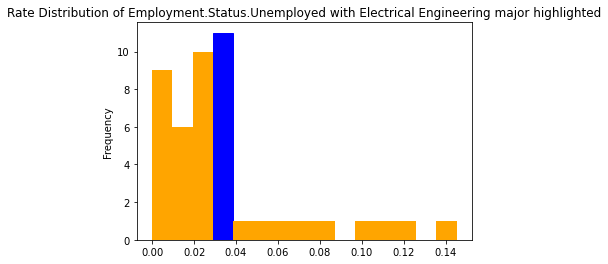

<module 'matplotlib.pyplot' from '/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [180]:
histogram_plot('Electrical Engineering','Employment.Status.Unemployed')

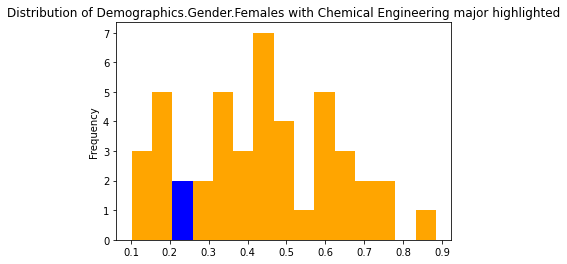

In [173]:
histogram_plot('Chemical Engineering','Demographics.Gender.Females')

In [178]:
for i in list(new_data):
    print('<option value="{0}">{0}</option>'.format(i))
    

<option value="Education.Major">Education.Major</option>
<option value="Demographics.Ethnicity.Minorities">Demographics.Ethnicity.Minorities</option>
<option value="Demographics.Gender.Females">Demographics.Gender.Females</option>
<option value="Education.Degrees.Bachelors">Education.Degrees.Bachelors</option>
<option value="Education.Degrees.Doctorates">Education.Degrees.Doctorates</option>
<option value="Education.Degrees.Masters">Education.Degrees.Masters</option>
<option value="Employment.Employer Type.Business/Industry">Employment.Employer Type.Business/Industry</option>
<option value="Employment.Employer Type.Educational Institution">Employment.Employer Type.Educational Institution</option>
<option value="Employment.Employer Type.Government">Employment.Employer Type.Government</option>
<option value="Employment.Status.Unemployed">Employment.Status.Unemployed</option>
